Lag: 10
Coefficients: [  3.21591401e+01   5.12436028e-02   2.54524702e-02   5.44560592e-03
  -4.30016757e-03   8.33608262e-02  -2.43705068e-01  -2.97458331e-01
  -1.31035727e-01   1.37405664e-02   5.85967756e-02]
predicted=21.509818, expected=26.040000
predicted=20.641639, expected=21.873908
predicted=20.312214, expected=20.711858
predicted=25.494054, expected=20.381871
predicted=27.060904, expected=20.405636
Test MSE: 18.526


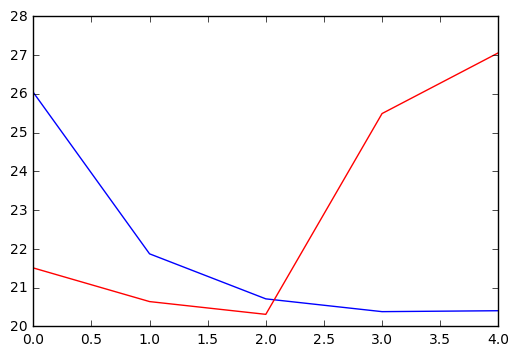

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

df = pd.read_csv('CA.csv')

# split dataset
X = df.PCP.values
train, test = X[:len(X)-5], X[len(X)-5:]

# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=21.509818, expected=26.040000
predicted=20.873782, expected=21.873908
predicted=20.490664, expected=20.711858
predicted=25.570567, expected=20.381871
predicted=26.796339, expected=20.405636
Test MSE: 17.867


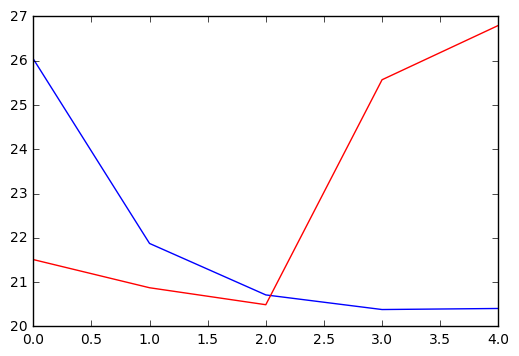

In [78]:
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()